In [1]:
import xarray as xr
import pandas as pd
import numpy as np
from metpy.units import units
from metpy import calc as mpcalc
import matplotlib
import matplotlib.pyplot as plt
from pathlib import Path
import math
import netCDF4
from netCDF4 import Dataset
from datetime import datetime, timedelta
from cftime import num2date, date2num

In [2]:
gh_file = "/home11/grad/2021/gd673524/research/gdines/data/ECMWF_gh_01252021.nc"
t_file = "/home11/grad/2021/gd673524/research/gdines/data/ECMWF_t_01252021.nc"
u_file = "/home11/grad/2021/gd673524/research/gdines/data/ECMWF_u_01252021.nc"
v_file = "/home11/grad/2021/gd673524/research/gdines/data/ECMWF_v_01252021.nc"
w_file = "/home11/grad/2021/gd673524/research/gdines/data/ECMWF_w_01252021.nc"

In [3]:
gh = Dataset(gh_file, mode='r')
t = Dataset(t_file, mode='r')
u = Dataset(u_file, mode='r')
v = Dataset(v_file, mode='r')
w = Dataset(w_file, mode='r')

In [4]:
gh

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_64BIT_OFFSET data model, file format NETCDF3):
    Conventions: CF-1.6
    history: 2022-01-13 17:31:35 GMT by grib_to_netcdf-2.24.0: grib_to_netcdf /data/scratch/20220113-1720/6c/_mars-webmars-public-svc-green-003-6fe5cac1a363ec1525f54343b6cc9fd8-VNBmP5.grib -o /data/scratch/20220113-1720/5d/_grib2netcdf-webmars-public-svc-green-006-6fe5cac1a363ec1525f54343b6cc9fd8-jX9zk5.nc -utime
    dimensions(sizes): longitude(240), latitude(121), level(10), number(10), time(940)
    variables(dimensions): float32 longitude(longitude), float32 latitude(latitude), int32 level(level), int32 number(number), int32 time(time), int16 gh(time, number, level, latitude, longitude)
    groups: 

In [40]:
#Creating Variables
latRange = gh.variables['latitude'][:]
lon = gh.variables['longitude'][:]
level = gh.variables['level'][:] #<--Levels=[10,50,100,200,300,500,700,850,925,1000]
time = gh.variables['time'][:]

#Variable Array Order [time(940), number(10)?, level(10), latitude(121), longitude(240)]
##I think that the number = the ensemble #, not really sure how to account for that
#z_500 = gh.variables['gh'][0,0,5,:,:]
z_1loc = gh.variables['gh'][:,1,5,1,1]
t_1loc = t.variables['t'][:,1,5,1,1]
u_1loc = u.variables['u'][:,1,5,1,1]
v_1loc = v.variables['v'][:,1,5,1,1]
w_1loc = w.variables['w'][:,1,5,1,1]

In [41]:
time

masked_array(data=[ 885936,  885960,  885984,  886008,  886032,  886056,
                    886080,  886104,  886128,  886152,  886176,  886200,
                    886224,  886248,  886272,  886296,  886320,  886344,
                    886368,  886392,  886416,  886440,  886464,  886488,
                    886512,  886536,  886560,  886584,  886608,  886632,
                    886656,  886680,  886704,  886728,  886752,  886776,
                    886800,  886824,  886848,  886872,  886896,  886920,
                    886944,  886968,  886992,  887016,  887040,  894696,
                    894720,  894744,  894768,  894792,  894816,  894840,
                    894864,  894888,  894912,  894936,  894960,  894984,
                    895008,  895032,  895056,  895080,  895104,  895128,
                    895152,  895176,  895200,  895224,  895248,  895272,
                    895296,  895320,  895344,  895368,  895392,  895416,
                    895440,  895464,  895488,  8955

In [24]:
#np.ndarray.flags(time)

In [75]:
#times = np.asarray(time) #<--nmasks array
times_list = np.array(time.tolist()) * units('hr')

In [77]:
dates = [datetime(1900,1,1)+n*timedelta(hours=24) for n in range(time.shape[0])]

In [76]:
#Dealing with Time Variable
dates = num2date(times_list[:],units=times_list.units,calendar=times_list.calendar)

AttributeError: Neither Quantity object nor its magnitude ([ 885936  885960  885984  886008  886032  886056  886080  886104  886128
  886152  886176  886200  886224  886248  886272  886296  886320  886344
  886368  886392  886416  886440  886464  886488  886512  886536  886560
  886584  886608  886632  886656  886680  886704  886728  886752  886776
  886800  886824  886848  886872  886896  886920  886944  886968  886992
  887016  887040  894696  894720  894744  894768  894792  894816  894840
  894864  894888  894912  894936  894960  894984  895008  895032  895056
  895080  895104  895128  895152  895176  895200  895224  895248  895272
  895296  895320  895344  895368  895392  895416  895440  895464  895488
  895512  895536  895560  895584  895608  895632  895656  895680  895704
  895728  895752  895776  895800  903456  903480  903504  903528  903552
  903576  903600  903624  903648  903672  903696  903720  903744  903768
  903792  903816  903840  903864  903888  903912  903936  903960  903984
  904008  904032  904056  904080  904104  904128  904152  904176  904200
  904224  904248  904272  904296  904320  904344  904368  904392  904416
  904440  904464  904488  904512  904536  904560  912216  912240  912264
  912288  912312  912336  912360  912384  912408  912432  912456  912480
  912504  912528  912552  912576  912600  912624  912648  912672  912696
  912720  912744  912768  912792  912816  912840  912864  912888  912912
  912936  912960  912984  913008  913032  913056  913080  913104  913128
  913152  913176  913200  913224  913248  913272  913296  913320  921000
  921024  921048  921072  921096  921120  921144  921168  921192  921216
  921240  921264  921288  921312  921336  921360  921384  921408  921432
  921456  921480  921504  921528  921552  921576  921600  921624  921648
  921672  921696  921720  921744  921768  921792  921816  921840  921864
  921888  921912  921936  921960  921984  922008  922032  922056  922080
  922104  929760  929784  929808  929832  929856  929880  929904  929928
  929952  929976  930000  930024  930048  930072  930096  930120  930144
  930168  930192  930216  930240  930264  930288  930312  930336  930360
  930384  930408  930432  930456  930480  930504  930528  930552  930576
  930600  930624  930648  930672  930696  930720  930744  930768  930792
  930816  930840  930864  938520  938544  938568  938592  938616  938640
  938664  938688  938712  938736  938760  938784  938808  938832  938856
  938880  938904  938928  938952  938976  939000  939024  939048  939072
  939096  939120  939144  939168  939192  939216  939240  939264  939288
  939312  939336  939360  939384  939408  939432  939456  939480  939504
  939528  939552  939576  939600  939624  947280  947304  947328  947352
  947376  947400  947424  947448  947472  947496  947520  947544  947568
  947592  947616  947640  947664  947688  947712  947736  947760  947784
  947808  947832  947856  947880  947904  947928  947952  947976  948000
  948024  948048  948072  948096  948120  948144  948168  948192  948216
  948240  948264  948288  948312  948336  948360  948384  956064  956088
  956112  956136  956160  956184  956208  956232  956256  956280  956304
  956328  956352  956376  956400  956424  956448  956472  956496  956520
  956544  956568  956592  956616  956640  956664  956688  956712  956736
  956760  956784  956808  956832  956856  956880  956904  956928  956952
  956976  957000  957024  957048  957072  957096  957120  957144  957168
  964824  964848  964872  964896  964920  964944  964968  964992  965016
  965040  965064  965088  965112  965136  965160  965184  965208  965232
  965256  965280  965304  965328  965352  965376  965400  965424  965448
  965472  965496  965520  965544  965568  965592  965616  965640  965664
  965688  965712  965736  965760  965784  965808  965832  965856  965880
  965904  965928  973584  973608  973632  973656  973680  973704  973728
  973752  973776  973800  973824  973848  973872  973896  973920  973944
  973968  973992  974016  974040  974064  974088  974112  974136  974160
  974184  974208  974232  974256  974280  974304  974328  974352  974376
  974400  974424  974448  974472  974496  974520  974544  974568  974592
  974616  974640  974664  974688  982344  982368  982392  982416  982440
  982464  982488  982512  982536  982560  982584  982608  982632  982656
  982680  982704  982728  982752  982776  982800  982824  982848  982872
  982896  982920  982944  982968  982992  983016  983040  983064  983088
  983112  983136  983160  983184  983208  983232  983256  983280  983304
  983328  983352  983376  983400  983424  983448  991128  991152  991176
  991200  991224  991248  991272  991296  991320  991344  991368  991392
  991416  991440  991464  991488  991512  991536  991560  991584  991608
  991632  991656  991680  991704  991728  991752  991776  991800  991824
  991848  991872  991896  991920  991944  991968  991992  992016  992040
  992064  992088  992112  992136  992160  992184  992208  992232  999888
  999912  999936  999960  999984 1000008 1000032 1000056 1000080 1000104
 1000128 1000152 1000176 1000200 1000224 1000248 1000272 1000296 1000320
 1000344 1000368 1000392 1000416 1000440 1000464 1000488 1000512 1000536
 1000560 1000584 1000608 1000632 1000656 1000680 1000704 1000728 1000752
 1000776 1000800 1000824 1000848 1000872 1000896 1000920 1000944 1000968
 1000992 1008648 1008672 1008696 1008720 1008744 1008768 1008792 1008816
 1008840 1008864 1008888 1008912 1008936 1008960 1008984 1009008 1009032
 1009056 1009080 1009104 1009128 1009152 1009176 1009200 1009224 1009248
 1009272 1009296 1009320 1009344 1009368 1009392 1009416 1009440 1009464
 1009488 1009512 1009536 1009560 1009584 1009608 1009632 1009656 1009680
 1009704 1009728 1009752 1017408 1017432 1017456 1017480 1017504 1017528
 1017552 1017576 1017600 1017624 1017648 1017672 1017696 1017720 1017744
 1017768 1017792 1017816 1017840 1017864 1017888 1017912 1017936 1017960
 1017984 1018008 1018032 1018056 1018080 1018104 1018128 1018152 1018176
 1018200 1018224 1018248 1018272 1018296 1018320 1018344 1018368 1018392
 1018416 1018440 1018464 1018488 1018512 1026192 1026216 1026240 1026264
 1026288 1026312 1026336 1026360 1026384 1026408 1026432 1026456 1026480
 1026504 1026528 1026552 1026576 1026600 1026624 1026648 1026672 1026696
 1026720 1026744 1026768 1026792 1026816 1026840 1026864 1026888 1026912
 1026936 1026960 1026984 1027008 1027032 1027056 1027080 1027104 1027128
 1027152 1027176 1027200 1027224 1027248 1027272 1027296 1034952 1034976
 1035000 1035024 1035048 1035072 1035096 1035120 1035144 1035168 1035192
 1035216 1035240 1035264 1035288 1035312 1035336 1035360 1035384 1035408
 1035432 1035456 1035480 1035504 1035528 1035552 1035576 1035600 1035624
 1035648 1035672 1035696 1035720 1035744 1035768 1035792 1035816 1035840
 1035864 1035888 1035912 1035936 1035960 1035984 1036008 1036032 1036056
 1043712 1043736 1043760 1043784 1043808 1043832 1043856 1043880 1043904
 1043928 1043952 1043976 1044000 1044024 1044048 1044072 1044096 1044120
 1044144 1044168 1044192 1044216 1044240 1044264 1044288 1044312 1044336
 1044360 1044384 1044408 1044432 1044456 1044480 1044504 1044528 1044552
 1044576 1044600 1044624 1044648 1044672 1044696 1044720 1044744 1044768
 1044792 1044816 1052472 1052496 1052520 1052544 1052568 1052592 1052616
 1052640 1052664 1052688 1052712 1052736 1052760 1052784 1052808 1052832
 1052856 1052880 1052904 1052928 1052952 1052976 1053000 1053024 1053048
 1053072 1053096 1053120 1053144 1053168 1053192 1053216 1053240 1053264
 1053288 1053312 1053336 1053360 1053384 1053408 1053432 1053456 1053480
 1053504 1053528 1053552 1053576]) has attribute 'calendar'

In [ ]:
np.shape(dates)

In [ ]:
type(t_1loc)

In [ ]:
fig = plt.figure(figsize=(15,12))
fig, ax = plt.subplots(1, 1)

# Create a time series of 500hPa Temperatures for 1 location 
ax.plot(dates, t_1loc, color='tab:red')
ax.set_title('500-hPa Temps')
ax.set_xlabel ('Time')
ax.set_ylabel ('Temp (K)')
ax.set_ylim(215,250)
ax.tick_params(axis='x', labelrotation = 90)

plt.show()

<Figure size 1080x864 with 0 Axes>

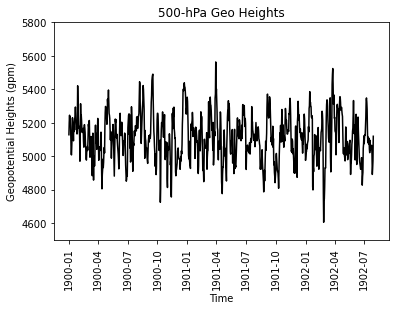

In [78]:
fig = plt.figure(figsize=(15,12))
fig, ax = plt.subplots(1, 1)

# Create a time series of 500hPa Geopotential Heights for 1 location 
ax.plot(dates, z_1loc, color='black')
ax.set_title('500-hPa Geo Heights')
ax.set_xlabel ('Time')
ax.set_ylabel ('Geopotential Heights (gpm)')
ax.set_ylim(4500,5800)
ax.tick_params(axis='x', labelrotation = 90)

plt.show()

In [ ]:
fig = plt.figure(figsize=(15,12))
fig, ax = plt.subplots(1, 1)

# Create a time series of 500hPa Temperatures for 1 location 
ax.plot(dates, u_1loc, color='tab:blue')
ax.set_title('500-hPa U-Wind')
ax.set_xlabel ('Time')
ax.set_ylabel ('u-Wind(m/s)')
ax.set_ylim(-40,40)
ax.tick_params(axis='x', labelrotation = 90)

plt.show()

In [ ]:
fig = plt.figure(figsize=(15,12))
fig, ax = plt.subplots(1, 1)

# Create a time series of 500hPa Temperatures for 1 location 
ax.plot(dates, v_1loc, color='tab:blue')
ax.set_title('500-hPa V-Wind')
ax.set_xlabel ('Time')
ax.set_ylabel ('v-Wind(m/s)')
ax.set_ylim(-50,40)
ax.tick_params(axis='x', labelrotation = 90)

plt.show()

In [ ]:
fig = plt.figure(figsize=(15,12))
fig, ax = plt.subplots(1, 1)

# Create a time series of 500hPa Temperatures for 1 location 
ax.plot(dates, w_1loc, color='tab:blue')
ax.set_title('500-hPa Vertical Velocity')
ax.set_xlabel ('Time')
ax.set_ylabel ('Vertical Motion (Pa/s)')
ax.set_ylim(-1,1)
ax.tick_params(axis='x', labelrotation = 90)

plt.show()